<a href="https://colab.research.google.com/github/Ajou201421102/Notebook/blob/main/VGG11_Basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1 : Classification & Fine-tuning


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Seed
import torch
import numpy as np
import random

torch.manual_seed(0)
torch.cuda.manual_seed(0)
np.random.seed(0)
random.seed(0)

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

### **1.1 VGG-11 Implementation**

아래 Table은 여러 종류의 VGG 네트워크에 대한 각각의 구성을 나타낸 것입니다.
<br>A에서 E까지 다양한 크기의 VGG 중에서 구현하고자 하는 네트워크는 **A에 해당하는 VGG-11**입니다.

----

<img src='https://drive.google.com/uc?id=1bFKnmwcbdJLQdCjNPxQdaYnTNCmBt0rK'  width="700">

아래의 코드는 VGG-11의 네트워크를 나타내는 클래스입니다. 위의 Table을 참고하여 2개의 **TO DO** 과제를 채워주세요 :)

- **TO DO (1)** : Feature extractor 역할을 수행하는 convolution layers를 구현하는 것이 과제입니다. 주어진 ```self.conv1, self.bn, self.pool1```을 참고하여 나머지 부분을 채워주세요.

- **TO DO (2)** : Convolution filter로 이루어진 feature extractor에서 얻은 이미지에 대한 feature를 통해 classification task를 수행하는 fully connected layer를 구현하고자 합니다. 주어진 ```self.fc1, self.dropout2```를 참고하여 나머지 부분을 채워주세요.

In [ ]:
import torch
import torch.nn as nn

class VGG11(nn.Module):
  def __init__(self, num_classes=1000):
    super(VGG11, self).__init__()

    self.relu = nn.ReLU(inplace=True)
    
    # Convolution Feature Extraction Part
    self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
    self.bn1   = nn.BatchNorm2d(64)
    self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

    '''==========================================================='''
    '''======================== TO DO (1) ========================'''
    self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
    self.bn2   = nn.BatchNorm2d(128)
    self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

    self.conv3_1 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
    self.bn3_1   = nn.BatchNorm2d(256)
    self.conv3_2 = nn.Conv2d(256, 256, kernel_size=3, padding=1)
    self.bn3_2   = nn.BatchNorm2d(256)
    self.pool3   = nn.MaxPool2d(kernel_size=2, stride=2)

    self.conv4_1 = nn.Conv2d(256, 512, kernel_size=3, padding=1)
    self.bn4_1   = nn.BatchNorm2d(512)
    self.conv4_2 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
    self.bn4_2   = nn.BatchNorm2d(512)
    self.pool4   = nn.MaxPool2d(kernel_size=2, stride=2)

    self.conv5_1 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
    self.bn5_1   = nn.BatchNorm2d(512)
    self.conv5_2 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
    self.bn5_2   = nn.BatchNorm2d(512)
    self.pool5   = nn.MaxPool2d(kernel_size=2, stride=2)
    '''======================== TO DO (1) ========================'''
    '''==========================================================='''
    

    # Fully Connected Classifier Part
    self.fc1      = nn.Linear(512 * 7 * 7, 4096)
    self.dropout1 = nn.Dropout()
    
    '''==========================================================='''
    '''======================== TO DO (2) ========================'''
    self.fc2      = nn.Linear(4096, 4096)
    self.dropout2 = nn.Dropout()
    
    self.fc3      = nn.Linear(4096, 1000)
    '''======================== TO DO (2) ========================'''
    '''==========================================================='''
    

  def forward(self, x):
    # Convolution Feature Extraction Part
    x = self.conv1(x)
    x = self.bn1(x)
    x = self.relu(x)
    x = self.pool1(x)

    x = self.conv2(x)
    x = self.bn2(x)
    x = self.relu(x)
    x = self.pool2(x)

    x = self.conv3_1(x)
    x = self.bn3_1(x)
    x = self.relu(x)
    x = self.conv3_2(x)
    x = self.bn3_2(x)
    x = self.relu(x)
    x = self.pool3(x)

    x = self.conv4_1(x)
    x = self.bn4_1(x)
    x = self.relu(x)
    x = self.conv4_2(x)
    x = self.bn4_2(x)
    x = self.relu(x)
    x = self.pool4(x)

    x = self.conv5_1(x)
    x = self.bn5_1(x)
    x = self.relu(x)
    x = self.conv5_2(x)
    x = self.bn5_2(x)
    x = self.relu(x)
    x = self.pool5(x)

    # Fully Connected Classifier Part
    x = torch.flatten(x, 1)
    x = self.fc1(x)
    x = self.relu(x)
    x = self.dropout1(x)
    
    x = self.fc2(x)
    x = self.relu(x)
    x = self.dropout2(x)
    
    x = self.fc3(x)
    return x

----
구현한 VGG-11에 문제가 없다면 네트워크의 **output tensor는 1000-dim vector**에 해당해야 합니다. 

<br>아래의 코드를 실행하여 **output tensor의 shape을 확인**해봅시다.
<br> 만약 ```out = model(x)```를 실행하였을 때 오류가 발생한다면 layer 구현에 오류가 있는 것이니 다시 한번 네트워크 코드에 문제가 없는지 확인해보세요 :)


아래의 문구와 동일하게 출력된다면 output tensor의 shape이 알맞게 return된 것입니다!
```python
"Output tensor shape is : torch.Size([1, 1000])"
```

In [ ]:
# Network
model = VGG11(num_classes=1000)

# Random input
x = torch.randn((1, 3, 224, 224))

# Forward
out = model(x)

# Check the output shape
print("Output tensor shape is :", out.shape)

Output tensor shape is : torch.Size([1, 1000])


----
아래는 네트워크 구현이 정확하게 되었는지를 확인하기 위한 코드입니다.

<br>아래의 코드는 **VGG-11의 중간 feature map들의 shape**을 바탕으로 일련의 연산을 수행하여 **하나의 값**을 계산합니다.
<br>채점을 위하여 아래의 코드 결과로 얻은 값을 **edwith에 제출**해주세요 :)

(주의 : 정확한 채점을 위하여 아래 코드는 수정하지 마세요!)

<br>예를 들어, 아래와 같은 실행 결과를 얻으셨다면 edwith 퀴즈에 7777을 선택해주세요.
```python
"Your answer is : 7777"
```

In [ ]:
import base64, copy

class Calculator:
  '''
  NOTE : DO NOT MODIFY THE CODE BELOW.
  '''
  def __init__(self, model):
    self.answer = 0
    layers = [b'Y29udjNfMQ==\n', b'cG9vbDM=\n', b'Y29udjVfMg==\n']
    for l in layers:
      self.hook = model._modules[base64.decodebytes(l).decode()].register_forward_hook(self.hook_fn)
    
  def hook_fn(self, module, input, output):
    self.answer += self._get_answer(output)
  
  def _get_answer(self, l):
    _, A, B, C = l.shape
    return A*(B-C//3)
    
  def unregister_forward_hook(self):
    self.hook.remove()
  

def calc_anwser(model):
  # NOTE : DO NOT MODIFY THE CODE BELOW.
  model_test = copy.deepcopy(model)
  ans_calculator = Calculator(model_test)

  x = torch.rand(1,3,224,224)
  model_test(x)

  print("Your answer is : %d" % ans_calculator.answer)

In [ ]:
calc_anwser(model)

Your answer is : 19712


----
### **1.2 Fine Tuning**

Fine tuning을 적용하였을 때의 장점을 확인하고자 하는 과제입니다.

네트워크를 처음부터 학습(scratch training) 하였을 때와 fine tuning을 적용하였을 때를 비교하는 것이 과제의 핵심입니다.

Pytorch에서 제공하는 ```torchvision.models.vgg11```의 ImageNet에 대한 ```pre-trained``` 옵션을 통해 과제를 수행해봅시다!

#### **>>> Dataset**

해당 과제에서는 이미지 속 인물의 **마스크 착용 여부와 마스크 착용 방식을 분류**하는 네트워크를 학습시키고자 합니다. (학습 시간 단축을 위해 일부 데이터만 사용)

시간 상의 문제로 실제로는 훨씬 많은 iteration을 반복하여 학습을 진행하여 정확도를 높여야 하지만 해당 과제에서는 1 epoch에 해당하는 **120번의 iteration만 진행**할 예정입니다. 과제 제출을 마치신 다음에는 더욱 오랜 시간동안 학습을 진행하여 성능을 더 높여보세요!

과제를 수행하기 앞서 별도로 전달해드린 **데이터셋 활용 가이드**를 따라 **```APY201231001_Face_Recognition_Masks_Dataset_Shared_Subset_1050.zip```** 압축 파일을 구글 드라이브에 **바로가기 추가**해주세요 :)


<br></br>**주의!** 해당 과정은 **데이터 저작권 보호**를 위해 로컬로 직접 데이터를 <U>**다운로드 받는 것을 금지**</U>하기 때문입니다. 또한 교육이 종료된 이후에 해당 데이터셋을 **구글 드라이브에서 파기**할 것을 원칙으로 합니다.
<img src='https://drive.google.com/uc?id=10H0twn3TQLneZtukSThviNLdFgDnJCiu'  width="700">

In [ ]:
# Mount the google drive to access the dataset.
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
# 저장하신 압축 파일의 경로에 맞게 아래의 압축 해제 명령어를 수정해주세요

!unzip /content/gdrive/MyDrive/APY201231001_Face_Recognition_Masks_Dataset_Shared_Subset_1050.zip -d /content/FaceDataset

Archive:  /content/gdrive/MyDrive/APY201231001_Face_Recognition_Masks_Dataset_Shared_Subset_1050.zip
   creating: /content/FaceDataset/data/
   creating: /content/FaceDataset/data/000001_female_Asian_45/
  inflating: /content/FaceDataset/data/000001_female_Asian_45/incorrect_mask.jpg  
  inflating: /content/FaceDataset/data/000001_female_Asian_45/mask1.jpg  
  inflating: /content/FaceDataset/data/000001_female_Asian_45/mask2.jpg  
  inflating: /content/FaceDataset/data/000001_female_Asian_45/mask3.jpg  
  inflating: /content/FaceDataset/data/000001_female_Asian_45/mask4.jpg  
  inflating: /content/FaceDataset/data/000001_female_Asian_45/mask5.jpg  
  inflating: /content/FaceDataset/data/000001_female_Asian_45/normal.jpg  
   creating: /content/FaceDataset/data/000002_female_Asian_52/
  inflating: /content/FaceDataset/data/000002_female_Asian_52/incorrect_mask.jpg  
  inflating: /content/FaceDataset/data/000002_female_Asian_52/mask1.jpg  
  inflating: /content/FaceDataset/data/000002_fe

In [ ]:
# Hyper-parameters
data_root = '/content/FaceDataset/data'
log_dir   = '/content/FaceDataset/log'

batch_size = 8
lr = 1e-4
input_size = 224

In [ ]:
# Dataset
import torch
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader

import os
import cv2
import numpy as np
from glob import glob

class MaskDataset(Dataset):
  def __init__(self, data_root, is_Train=True, input_size=224, transform=None):
    super(MaskDataset, self).__init__()

    self.img_list = self._load_img_list(data_root, is_Train)
    self.len = len(self.img_list)
    self.input_size = input_size
    self.transform = transform

  def __getitem__(self, index):
    img_path = self.img_list[index]
    
    # Image Loading
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img/255.

    if self.transform:
      img = self.transform(img)

    # Ground Truth
    label = self._get_class_idx_from_img_name(img_path)

    return img, label

  def __len__(self):
    return self.len

  def _load_img_list(self, data_root, is_Train):
    # Change the name of directory which has inconsistent naming rule.
    full_img_list = glob(data_root + '/*')
    for dir in full_img_list:
      dirname = os.path.basename(dir)
      if '-1' in dirname:
        os.rename(dir, dir.replace(dirname, dirname.replace('-1', '1')))
    
    # ID < 1000 for Training (N=721)
    # 1000 < ID < 1050 for Validation (N=63)
    img_list = []
    for dir in glob(data_root + '/*'):
      if is_Train and (self._load_img_ID(dir) < 500):
        img_list.extend(glob(dir+'/*'))
      elif not is_Train and (1000 < self._load_img_ID(dir) < 1050):
        img_list.extend(glob(dir+'/*'))

    return img_list

  def _load_img_ID(self, img_path):
    return int(os.path.basename(img_path).split('_')[0])

  def _get_class_idx_from_img_name(self, img_path):
    img_name = os.path.basename(img_path)

    if 'normal' in img_name: return 0
    elif 'mask1' in img_name: return 1
    elif 'mask2' in img_name: return 2
    elif 'mask3' in img_name: return 3
    elif 'mask4' in img_name: return 4
    elif 'mask5' in img_name: return 5
    elif 'incorrect_mask' in img_name: return 6
    else:
      raise ValueError("%s is not a valid filename. Please change the name of %s." % (img_name, img_path))

In [ ]:
# Dataset and Data Loader
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((224,224)),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                          std=[0.229, 0.224, 0.225])
])

train_dataset = MaskDataset(data_root, is_Train=True, input_size=input_size, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=batch_size, pin_memory=True, shuffle=True)

valid_dataset = MaskDataset(data_root, is_Train=False, input_size=input_size, transform=transform)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, pin_memory=True, shuffle=False)

In [ ]:
# Misc

class AverageMeter(object):
  """Computes and stores the average and current value"""
  def __init__(self):
      self.reset()

  def reset(self):
    self.val = 0
    self.avg = 0
    self.sum = 0
    self.count = 0

  def update(self, val, n=1):
    self.val = val
    self.sum += val * n
    self.count += n
    self.avg = self.sum / self.count

----
#### **>>> 1.2.1 Training From Scratch**

Pre-training을 사용하지 않고 초기 상태부터 학습을 진행(from scratch)하는 단계입니다.

- **TO DO Setting** : 매우 간단하지만 어떻게 보면 핵심이라고 할 수 있는 설정입니다. ```torchvision.models.vgg11```을 이용하여 네트워크를 선언할 때, ImageNet에 pre-train된 weights를 초기값으로 설정할지 여부를 결정하는 ```pretrained``` 파라미터 값을 ```True```와 ```False``` 둘 중 하나의 값으로 채워주세요.

- **TO DO Main (1)** : VGG-11을 본격적으로 학습하는 과정입니다. 주석에 적힌 내용을 따라 loss function인 ```criterion```과 ```optimizer```를 활용하여 빈 부분을 채워주세요.

- **TO DO Main (2)** : 학습된 VGG-11을 validation dataset에 대해 평가하는 과정입니다. Validation 과정에서는 <U>gradient 계산과 backpropagation이 필요 없다</U>는 것에 주목하여 빈 부분을 채워주세요.


In [ ]:
from torchvision.models import vgg11

'''======================== TO DO Setting ========================'''
pretrained =  False   # True of False
'''==============================================================='''

model = vgg11(pretrained)
model.classifier[6] = nn.Linear(in_features=4096, out_features=7, bias=True)
model.cuda()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace=True)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU(inplace=True)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
 

In [ ]:
# Loss function and Optimizer
from torch.optim import Adam

criterion = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=lr)

In [ ]:
# Main
os.makedirs(log_dir, exist_ok=True)
cuda = 'cuda' if torch.cuda.is_available() else 'cpu'
with open(os.path.join(log_dir, 'scratch_train_log.csv'), 'w') as log:
  # Training
  for iter, (img, label) in enumerate(train_loader):
    '''================================================================'''
    '''======================== TO DO Main (1) ========================'''
    # https://tutorials.pytorch.kr/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py
    # pytorch classifier tutorial
    # optimizer에 저장된 미분값을 0으로 초기화
    optimizer.zero_grad()

    # GPU 연산을 위해 이미지와 정답 tensor를 GPU로 보내기 (필요한 경우, 변수의 type도 수정해주세요)
    img, label = torch.tensor(img,dtype=torch.float,device=cuda),torch.tensor(label,dtype=torch.long,device=cuda)

    # 모델에 이미지 forward
    pred_logit = model(img)

    # loss 값 계산
    loss = criterion(pred_logit, label)

    # Backpropagation
    loss.backward()
    optimizer.step()
    

    # Accuracy 계산
    pred_label = 0.0
    _, preds = torch.max(pred_logit.data, 1)
    pred_label += torch.sum(preds == label.data)
    acc = pred_label / len(img)
    # https://pytorch.org/tutorials/beginner/finetuning_torchvision_models_tutorial.html
    '''======================== TO DO Main (1) ========================'''
    '''================================================================'''

    train_loss = loss.item()
    train_acc = acc

    # Validation for every 20 epoch
    if (iter % 20 == 0) or (iter == len(train_loader)-1):
      valid_loss, valid_acc = AverageMeter(), AverageMeter()

      for img, label in valid_loader:
        '''================================================================'''
        '''======================== TO DO Main (2) ========================'''
        # GPU 연산을 위해 이미지와 정답 tensor를 GPU로 보내기 (필요한 경우, 변수의 type도 수정해주세요)
        img, label = torch.tensor(img,dtype=torch.float,device=cuda),torch.tensor(label,dtype=torch.long,device=cuda)

        # 모델에 이미지 forward (gradient 계산 X)
        with torch.no_grad():
          pred_logit = model(img)
        

        # loss 값 계산
        loss = criterion(pred_logit, label)

        # Accuracy 계산
        n_correct = 0.0
        _, pred_label = torch.max(pred_logit.data, 1)
        n_correct += torch.sum(pred_label == label.data)
        acc = n_correct / len(img)
        '''======================== TO DO Main (2) ========================'''
        '''================================================================'''

        valid_loss.update(loss.item(), len(img))
        valid_acc.update(acc, len(img))

      valid_loss = valid_loss.avg
      valid_acc = valid_acc.avg

      print("Iter [%3d/%3d] | Train Loss %.4f | Train Acc %.4f | Valid Loss %.4f | Valid Acc %.4f" %
            (iter, len(train_loader), train_loss, train_acc, valid_loss, valid_acc))
      
      # Train Log Writing
      log.write('%d,%.4f,%.4f,%.4f,%.4f\n'%(iter, train_loss, train_acc, valid_loss, valid_acc))

Iter [  0/120] | Train Loss 1.9423 | Train Acc 0.1250 | Valid Loss 1.9422 | Valid Acc 0.1429
Iter [ 20/120] | Train Loss 1.8777 | Train Acc 0.2500 | Valid Loss 1.8576 | Valid Acc 0.1801
Iter [ 40/120] | Train Loss 1.7834 | Train Acc 0.2500 | Valid Loss 1.8286 | Valid Acc 0.3075
Iter [ 60/120] | Train Loss 1.4938 | Train Acc 0.5000 | Valid Loss 1.7293 | Valid Acc 0.3106
Iter [ 80/120] | Train Loss 1.1811 | Train Acc 0.6250 | Valid Loss 1.5725 | Valid Acc 0.3199
Iter [100/120] | Train Loss 1.6747 | Train Acc 0.3750 | Valid Loss 1.4070 | Valid Acc 0.4006
Iter [119/120] | Train Loss 1.6601 | Train Acc 0.2857 | Valid Loss 1.4713 | Valid Acc 0.3851


----
#### **>>> 1.2.2 Fine Tuning**

ImageNet에 pre-train된 weights를 초기값으로 사용하여 학습을 진행(**fine tuning**)하는 단계입니다.
<br>이번 과제에서는 feature extraction 역할을 하는 **convolution layer 부분의 weights를 고정(freeze)**시키고 나머지 classifier 역할을 담당하는 **fully connected 부분만 학습**할 예정입니다.

- **TO DO Setting** : 마찬가지로 ImageNet에 pre-train된 weights를 초기값으로 설정할지 여부를 결정하는 ```pretrained``` 파라미터 값을 ```True```와 ```False``` 둘 중 하나의 값으로 채워주세요.

- **TO DO Main (1) & (2)** : 1.2.1 Training From Scratch에서 작성하신 코드를 그대로 사용하시면 됩니다 :)

In [ ]:
from torchvision.models import vgg11

'''======================== TO DO Setting ========================'''
pretrained =  True    # True of False
'''==============================================================='''

model = vgg11(pretrained)
model.classifier[6] = nn.Linear(in_features=4096, out_features=7, bias=True)
model.cuda()

# Freeze the feature extracting convolution layers
for param in model.features.parameters():
    param.requires_grad = False

In [ ]:
# Loss function and Optimizer
from torch.optim import Adam

criterion = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=lr)

In [ ]:
# Main
os.makedirs(log_dir, exist_ok=True)

with open(os.path.join(log_dir, 'fine_tuned_train_log.csv'), 'w') as log:
  # Training
  for iter, (img, label) in enumerate(train_loader):
    '''================================================================'''
    '''======================== TO DO Main (1) ========================'''
    # optimizer에 저장된 미분값을 0으로 초기화
    optimizer.zero_grad()

    # GPU 연산을 위해 이미지와 정답 tensor를 GPU로 보내기 (필요한 경우, 변수의 type도 수정해주세요)
    img, label = torch.tensor(img,dtype=torch.float,device=cuda),torch.tensor(label,dtype=torch.long,device=cuda)

    # 모델에 이미지 forward
    pred_logit = model(img)

    # loss 값 계산
    loss = loss = criterion(pred_logit, label)

    # Backpropagation
    loss.backward()
    optimizer.step()
    

    # Accuracy 계산
    pred_label = 0.0
    _, preds = torch.max(pred_logit.data, 1)
    pred_label += torch.sum(preds == label.data)
    acc = pred_label / len(img)
    '''======================== TO DO Main (1) ========================'''
    '''================================================================'''

    train_loss = loss.item()
    train_acc = acc

    # Validation for every 20 epoch
    if (iter % 20 == 0) or (iter == len(train_loader)-1):
      valid_loss, valid_acc = AverageMeter(), AverageMeter()

      for img, label in valid_loader:
        '''================================================================'''
        '''======================== TO DO Main (2) ========================'''
        # GPU 연산을 위해 이미지와 정답 tensor를 GPU로 보내기 (필요한 경우, 변수의 type도 수정해주세요)
        img, label = torch.tensor(img,dtype=torch.float,device=cuda),torch.tensor(label,dtype=torch.long,device=cuda)

        # 모델에 이미지 forward (gradient 계산 X)
        with torch.no_grad():
          pred_logit = model(img)
        

        # loss 값 계산
        loss = criterion(pred_logit, label)

        # Accuracy 계산
        n_correct = 0.0
        _, pred_label = torch.max(pred_logit.data, 1)
        n_correct += torch.sum(pred_label == label.data)
        acc = n_correct / len(img)
        '''======================== TO DO Main (2) ========================'''
        '''================================================================'''

        valid_loss.update(loss.item(), len(img))
        valid_acc.update(acc, len(img))

      valid_loss = valid_loss.avg
      valid_acc = valid_acc.avg

      print("Iter [%3d/%3d] | Train Loss %.4f | Train Acc %.4f | Valid Loss %.4f | Valid Acc %.4f" %
            (iter, len(train_loader), train_loss, train_acc, valid_loss, valid_acc))
      
      # Train Log Writing
      log.write('%d,%.4f,%.4f,%.4f,%.4f\n'%(iter, train_loss, train_acc, valid_loss, valid_acc))

Iter [  0/120] | Train Loss 2.3446 | Train Acc 0.0000 | Valid Loss 2.0228 | Valid Acc 0.1894
Iter [ 20/120] | Train Loss 1.3297 | Train Acc 0.5000 | Valid Loss 1.5794 | Valid Acc 0.4099
Iter [ 40/120] | Train Loss 1.3445 | Train Acc 0.5000 | Valid Loss 1.4612 | Valid Acc 0.4472
Iter [ 60/120] | Train Loss 0.4375 | Train Acc 0.8750 | Valid Loss 1.4346 | Valid Acc 0.5000
Iter [ 80/120] | Train Loss 0.5000 | Train Acc 0.8750 | Valid Loss 1.4515 | Valid Acc 0.5124
Iter [100/120] | Train Loss 0.9718 | Train Acc 0.7500 | Valid Loss 1.1759 | Valid Acc 0.5870
Iter [119/120] | Train Loss 1.3986 | Train Acc 0.7143 | Valid Loss 1.2631 | Valid Acc 0.5901


----
#### **>>> 1.2.3 Training Log Visualization**

초기부터 학습(training from scratch)한 모델과 fine tuning을 사용한 모델을 비교하기 위해 **각 epoch 마다 저장한 validation 데이터셋에 대한 loss 값과 accuracy를 시각화**하여 확인하고자 합니다.

- **TO DO** : 아래의 시각화 코드를 활용하여 초기부터 학습하였을 때와 fine tuning을 진행하였을 때의 성능 변화를 시각화해주세요. ```matplotlib```을 이용하여 시각화한 그래프가 해당 colab notebook 파일에 남아있어야 하며 해당 과정을 마치신 뒤에 edwith의 댓글로 colab link를 남겨주세요.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Load log file
scratch_train_log = pd.read_csv(os.path.join(log_dir, 'scratch_train_log.csv'), index_col=0, header=None)
fine_tuned_train_log = pd.read_csv(os.path.join(log_dir, 'fine_tuned_train_log.csv'), index_col=0, header=None)

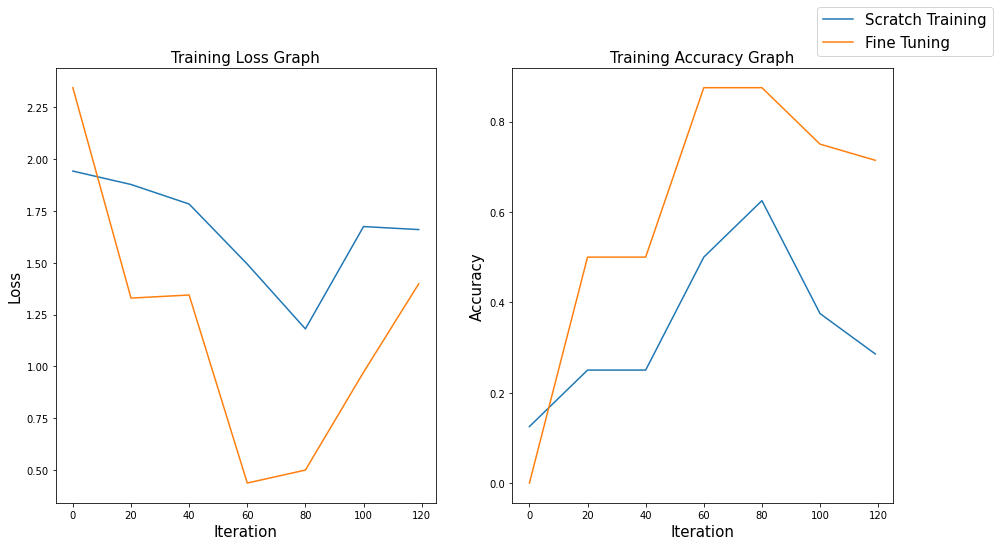

In [ ]:
# Visualize training log
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8))

ax1.plot(scratch_train_log.iloc[:,0], label='Scratch Training')
ax1.plot(fine_tuned_train_log.iloc[:,0], label='Fine Tuning')
ax1.set_title('Training Loss Graph', fontsize=15)
ax1.set_xlabel('Iteration', fontsize=15)
ax1.set_ylabel('Loss', fontsize=15)

fig.legend(fontsize=15)

ax2.plot(scratch_train_log.iloc[:,1], label='Scratch Training')
ax2.plot(fine_tuned_train_log.iloc[:,1], label='Fine Tuning')
ax2.set_title('Training Accuracy Graph', fontsize=15)
ax2.set_xlabel('Iteration', fontsize=15)
ax2.set_ylabel('Accuracy', fontsize=15)

plt.show()

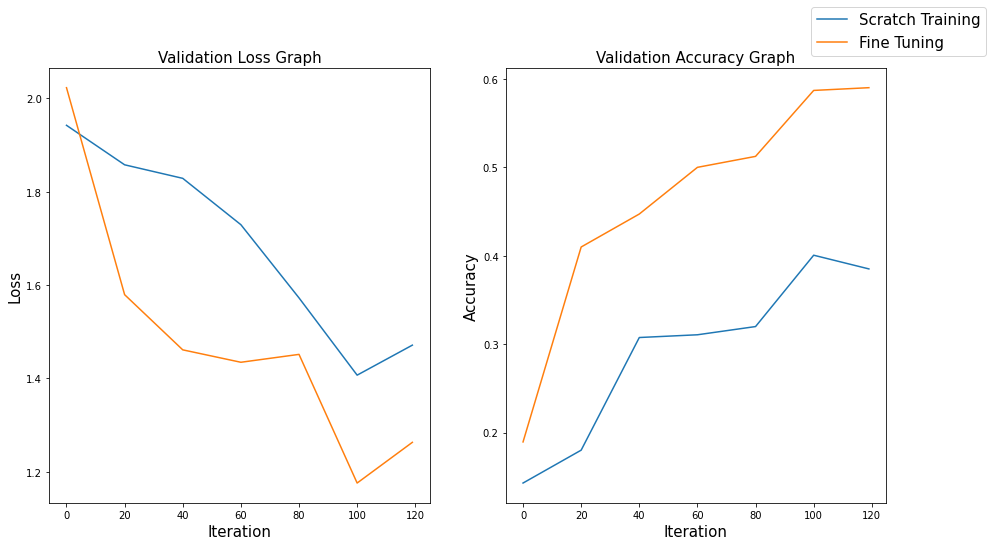

In [ ]:
# Visualize validation log
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8))

ax1.plot(scratch_train_log.iloc[:,2], label='Scratch Training')
ax1.plot(fine_tuned_train_log.iloc[:,2], label='Fine Tuning')
ax1.set_title('Validation Loss Graph', fontsize=15)
ax1.set_xlabel('Iteration', fontsize=15)
ax1.set_ylabel('Loss', fontsize=15)

fig.legend(fontsize=15)

ax2.plot(scratch_train_log.iloc[:,3], label='Scratch Training')
ax2.plot(fine_tuned_train_log.iloc[:,3], label='Fine Tuning')
ax2.set_title('Validation Accuracy Graph', fontsize=15)
ax2.set_xlabel('Iteration', fontsize=15)
ax2.set_ylabel('Accuracy', fontsize=15)

plt.show()